## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
pharma_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
pharma_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
pharma_data["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pharma_data.loc[pharma_data.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_metadata[mouse_metadata["Mouse ID"].isin(duplicate_mice)==False]
clean_study = study_results[study_results["Mouse ID"].isin(duplicate_mice)==False]
new_pharma_data = pd.merge(clean_mouse, clean_study)
new_pharma_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_pharma_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen_data = new_pharma_data.groupby(["Drug Regimen"])
tumor_mean = drug_regimen_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen_data["Tumor Volume (mm3)"].median()
tumor_variance = drug_regimen_data["Tumor Volume (mm3)"].var()
tumor_std = drug_regimen_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_regimen_data["Tumor Volume (mm3)"].sem()
tumor_summary = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median,"Variance":tumor_variance,"Standard deviation":tumor_std,"SEM":tumor_sem})
tumor_summary

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
datapoints = new_pharma_data.groupby(["Drug Regimen"])["Mouse ID"].count()

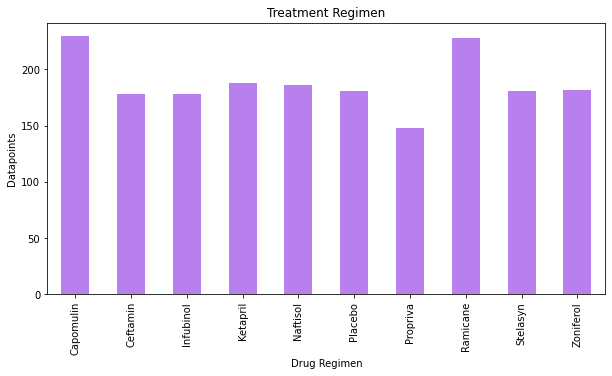

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
datapoints.plot(kind="bar",figsize=(10,5),color="blueviolet", alpha=0.6)

plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

plt.show()
plt.tight_layout()

In [10]:
x_axis = np.arange(len(datapoints))

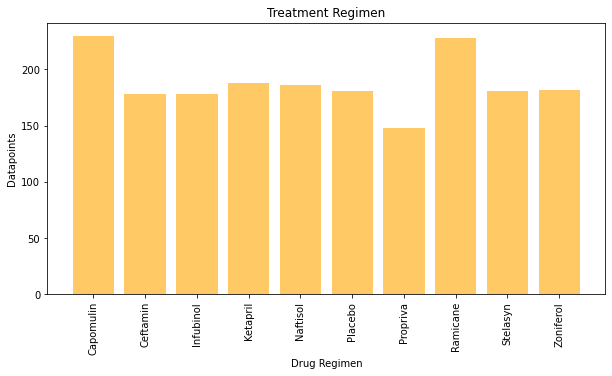

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(10,5))
plt.bar(x_axis, datapoints, color="orange", alpha=0.6)
x = plt.xticks(x_axis, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

plt.show()
plt.tight_layout()

In [12]:
mouse_gender = new_pharma_data.groupby(["Sex"])["Mouse ID"].count()

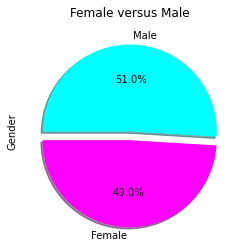

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot(kind="pie",title=("Female versus Male"),startangle=180, explode = (0.1, 0),
                        autopct="%1.1f%%",shadow=True, colors =["magenta","cyan"])

plt.ylabel("Gender")
plt.show()
plt.tight_layout()

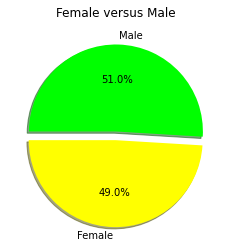

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1, 0)
labels = ["Female","Male"]
colors = ["yellow","lime"]
plt.pie(mouse_gender, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

plt.title("Female versus Male")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume_drug = new_pharma_data[new_pharma_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_timepoint = tumor_volume_drug.loc[tumor_volume_drug["Timepoint"] == 45]

In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(tumor_volume_timepoint, new_pharma_data)
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660,3
59,y163,Infubinol,Female,17,27,45,67.685569,3
60,y769,Ceftamin,Female,6,27,45,68.594745,4
61,y865,Ceftamin,Male,23,26,45,64.729837,3


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
        
    specific_tumor_vols = final_tumor_volume["Tumor Volume (mm3)"].loc[final_tumor_volume["Drug Regimen"] == drug]
    
    # add subset
    tumor_volume_data.append(specific_tumor_vols)

    # Determine outliers using upper and lower bounds
    quantiles = specific_tumor_vols.quantile([.25,.5,.75])
    quantiles
        
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    iqr = Q3 - Q1
    print()
    print(f"For {drug},The lower quartile is: {Q1}")
    print(f"For {drug}, the upper quartile is: {Q3}")
    print(f"For {drug}, the interquartile range is: {iqr}")
    print(f"For {drug}, the median is: {quantiles[0.5]} ")
    print()
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


For Capomulin,The lower quartile is: 32.37735684
For Capomulin, the upper quartile is: 40.1592203
For Capomulin, the interquartile range is: 7.781863460000004
For Capomulin, the median is: 37.31184577 

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

For Ramicane,The lower quartile is: 30.981175224999998
For Ramicane, the upper quartile is: 38.508305307499995
For Ramicane, the interquartile range is: 7.527130082499998
For Ramicane, the median is: 34.848627300000004 

Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.

For Infubinol,The lower quartile is: 62.75445141
For Infubinol, the upper quartile is: 67.68556862
For Infubinol, the interquartile range is: 4.9311172099999965
For Infubinol, the median is: 66.08306589 

Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.

For Ceftamin,The lower quartile is: 61.43389223
For Ceftamin, the upper 

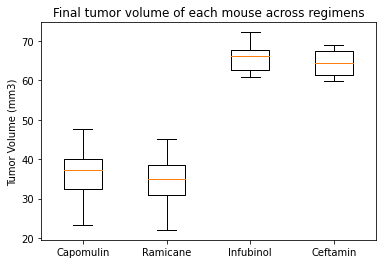

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_data)
plt.title("Final tumor volume of each mouse across regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
